In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing essential libraries for data manipulation and visualization.


In [3]:
# Load the public safety data from a CSV file
public_safety_csv_path = 'public-safety.csv'
public_safety_data = pd.read_csv(public_safety_csv_path)

# Initially load the data to see what's inside it.


In [4]:
# Data cleaning process: Convert population data to integers for further calculations.
public_safety_data['Population (2010)'] = public_safety_data['Population (2010)'].str.replace(',', '').astype(int)


In [5]:
# Calculating the total crimes by summing up major, minor, and other reports.
public_safety_data['Total Crimes (2010)'] = (
    public_safety_data['#Part 1 (Major Crime) Reports (2010)'] +
    public_safety_data['#Part 2 Reports (2010)'] +
    public_safety_data['#Other Police Reports (2010)']
)


In [8]:
# Calculating crimes per capita by dividing total crimes by the population.
public_safety_data['Crimes per Capita (2010)'] = public_safety_data['Total Crimes (2010)'] / public_safety_data['Population (2010)']
crimes_per_capita_sorted = public_safety_data[['Neighborhood', 'Crimes per Capita (2010)']].sort_values(by='Crimes per Capita (2010)', ascending=True)
# Display the sorted list of neighborhoods by crimes per capita for easy comparison.
crimes_per_capita_sorted


,Neighborhood,Crimes per Capita (2010)
31,Fairywood,0.017964
54,New Homestead,0.020202
75,Squirrel Hill North,0.033266
45,Lincoln Place,0.039665
81,Swisshelm Park,0.039677
...,...,...
86,West End,0.562992
56,North Shore,0.603960
79,Strip District,0.753247
70,South Shore,7.736842


In [9]:
# Calculating the percentage of major crimes out of total crimes.
public_safety_data['Percent Major Crimes (2010)'] = public_safety_data['#Part 1 (Major Crime) Reports (2010)'] / public_safety_data['Total Crimes (2010)'] * 100
percent_major_crimes_sorted = public_safety_data[['Neighborhood', 'Percent Major Crimes (2010)']].sort_values(by='Percent Major Crimes (2010)', ascending=False)
# Display the sorted list of neighborhoods by percentage of major crimes.
percent_major_crimes_sorted


,Neighborhood,Percent Major Crimes (2010)
65,Regent Square,59.375000
33,Friendship,52.662722
81,Swisshelm Park,51.851852
67,Shadyside,51.233553
16,Central Business District,45.318782
...,...,...
20,Chartiers City,20.454545
21,Chateau,18.181818
35,Glen Hazel,16.949153
31,Fairywood,16.666667


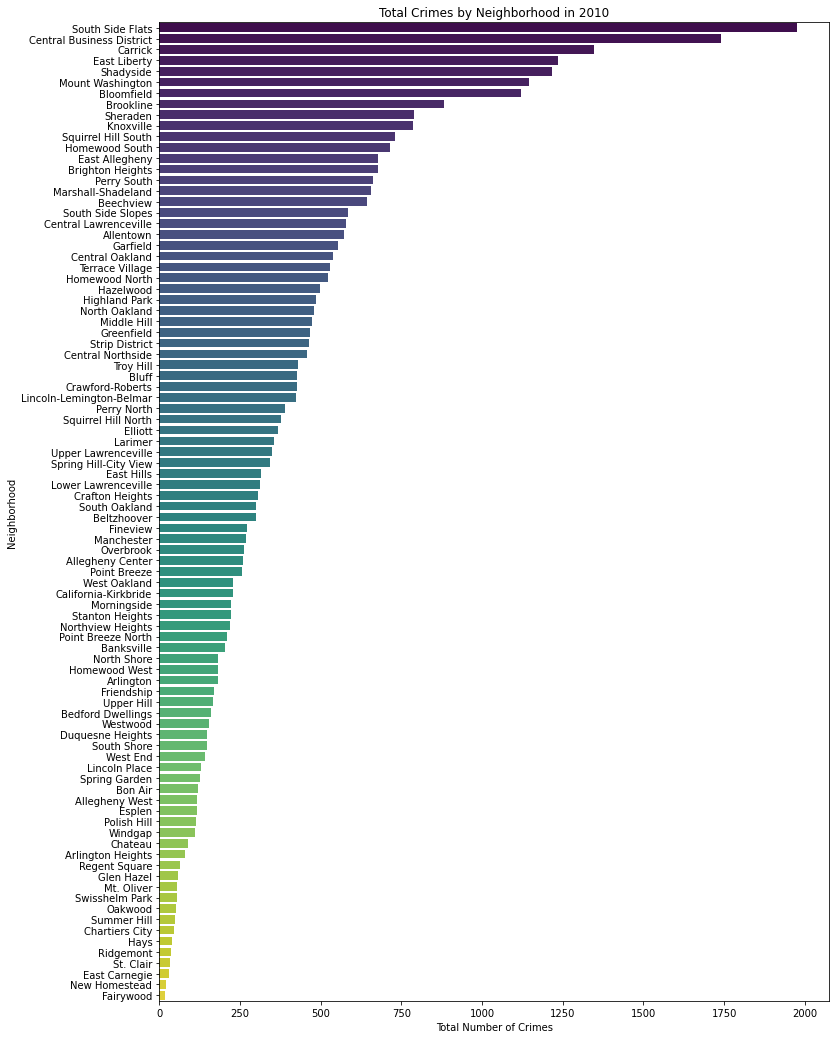

In [10]:
# Visualizing the total crimes in each neighborhood for a clear visual comparison.
plt.figure(figsize=(12, 18))
sns.barplot(x='Total Crimes (2010)', y='Neighborhood', data=public_safety_data.sort_values('Total Crimes (2010)', ascending=False), palette='viridis')
plt.title('Total Crimes by Neighborhood in 2010')
plt.xlabel('Total Number of Crimes')
plt.ylabel('Neighborhood')
plt.show()
